<a href="https://colab.research.google.com/github/HugoStigletz/Data-Analytics-Portfolio/blob/main/6_7_3_def_difference(dataset%2C_interval%3D1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lesson: Stationary Processes

In this activity, you will determine if the California Wildfires time series data is stationary.  If it is not, you will see if a transformation can remove some of the trend over time. 

#Step 1: Download and Save the `CA_Wildfires.csv` Dataset From the Class Materials  

* Make a note of where you saved the file on your computer.

#Step 2: Upload the `CA_Wildfires.csv` Dataset by Running the Following Code Block 

* When prompted, navigate to and select the `CA_Wildfires.csv` dataset where you saved it on your computer.
* This is a pretty large dataset, so it may take a little while.

In [ ]:
#Step 2

from google.colab import files
heights = files.upload()

## Step 3: Import Required Libraries 

Import `pandas as pd` the `pyplot` module from `matplotlib as plt` and `datetime`.

In [1]:
#Step 3
import pandas as pd
import matplotlib.pyplot as plt
import datetime



# Step 4: Read the CSV File and Get Column and Row Information 

Create a DataFrame called `Fires` from the `CA_Wildfires.csv`. Call the `.info()` function to review the columns and their datatypes.

In [3]:
#Step 4
Fires = pd.read_csv('/content/6.6.2 & 6.6.3 CA_wildfires.csv')


In [5]:
Fires

,SOURCE_REPORTING_UNIT_NAME,FIRE_YEAR,FIRE_SIZE,LONGITUDE,LATITUDE,DISCOVERY_DATE,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_CODE,STAT_CAUSE_DESCR,CONT_DATE,CONT_DOY,CONT_TIME,OWNER_DESCR,STATE,COUNTY
0,Eldorado National Forest,2004,0.1,-119.913333,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1400.0,USFS,CA,3.0
1,Eldorado National Forest,2004,0.1,-119.933056,38.559167,2453184.5,180,1600.0,1,Lightning,2453189.5,185.0,1200.0,USFS,CA,3.0
2,Eldorado National Forest,2004,16823.0,-120.211667,38.523333,2453284.5,280,1415.0,2,Equipment Use,2453299.5,295.0,1000.0,USFS,CA,5.0
3,Eldorado National Forest,2004,7700.0,-120.260000,38.780000,2453291.5,287,1618.0,2,Equipment Use,2453295.5,291.0,1800.0,USFS,CA,17.0
4,Humboldt-Toiyabe National Forest,2005,0.1,-119.840556,38.700278,2453496.5,126,1145.0,5,Debris Burning,2453499.5,129.0,1330.0,STATE OR PRIVATE,CA,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5769,Lassen-Modoc Unit,2010,0.1,-120.580424,41.273543,2455402.5,206,1520.0,9,Miscellaneous,2455404.5,208.0,1346.0,STATE OR PRIVATE,CA,NaN
5770,CDF - Merced-Mariposa Unit,2014,480.0,-120.191168,37.600389,2456814.5,157,1728.0,2,Equipment Use,2456816.5,159.0,1800.0,MISSING/NOT SPECIFIED,CA,NaN
5771,Tulare Unit,2014,0.1,-118.857999,36.032229,2456841.5,184,834.0,7,Arson,2456845.5,188.0,1523.0,STATE OR PRIVATE,CA,NaN
5772,Shasta-Trinity Unit,2015,30.0,-122.397660,40.469090,2457232.5,210,1745.0,13,Missing/Undefined,2457237.5,215.0,1836.0,STATE OR PRIVATE,CA,NaN


# Step 5: Determine the Data of Each Fire

Run the following code block to format the fire start data correctly.

In [8]:
Fires[['FIRE_YEAR', 'DISCOVERY_DOY']].head()

,FIRE_YEAR,DISCOVERY_DOY
0,2004,180
1,2004,180
2,2004,280
3,2004,287
4,2005,126


In [9]:
#Step 5
# 'FIRE_YEAR' * 1000 = 2004000 + 180 = 2004180
Fires['Date'] = pd.to_datetime(Fires['FIRE_YEAR'] * 1000 + Fires['DISCOVERY_DOY'], format='%Y%j')

# Step 6: Plot the Data

Use `Fires['Date'].plot()` to plot the time series.  

Is this a stationary process?

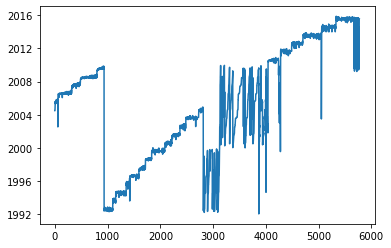

In [7]:
#Step 6
Fires['Date'].plot()


**Step 6 Answer:**



In [10]:
Fires.shape

(5774, 17)

# Step 7: Difference the Data

Run the following code block to difference the data.  The results will be stored in a Pandas series called `diff`.

In [ ]:
2, 5, 6, 10, 18
# diff of 1 = 3 , 1, 4, 8
# diff of 2 = 4, 5, 12
# Move to the next value by 1 and subtract the current value with the next value 

In [11]:
#Step 7

def difference(dataset, interval=1):
    diff = list()
    for i in range(interval, len(dataset)):
        value = dataset[i] - dataset[i - interval]
        diff.append(value)
    return pd.Series(diff)

x = Fires['Date'].values
diff = difference(x)

print(diff)

0         0 days
1       100 days
2         7 days
3       205 days
4        56 days
          ...   
5768    358 days
5769   1412 days
5770     27 days
5771    391 days
5772      3 days
Length: 5773, dtype: timedelta64[ns]


In [15]:
diff[:10]

0     0 days
1   100 days
2     7 days
3   205 days
4    56 days
5    20 days
6     7 days
7    -8 days
8    18 days
9     0 days
dtype: timedelta64[ns]

# Step 8: Plot the Differenced Data

Use `plt.plot(diff)` to plot the differenced time series data.  

Does the time series appear stationary now?

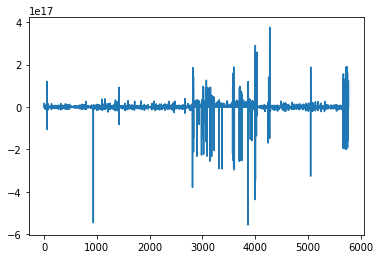

In [16]:
#Step 8
plt.plot(diff)



**Step 8 Answer:**

